In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

In [26]:
# Deal with missing values.

for col in education_df:
    if (education_df[col].isnull().sum()*100/education_df[col].isnull().count() > 0.0 and
        education_df[col].isnull().sum()*100/education_df[col].isnull().count() < 20.0):
            education_df[col].interpolate()

education_df.dropna(inplace=True)          
# education_df.isnull().sum()*100/education_df.isnull().count()             

Text(0.5, 1.0, 'Box plot of total expenditure')

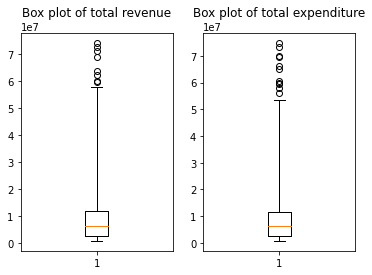

In [20]:
# 1. Consider the two variables TOTAL_REVENUE and TOTAL_EXPENDITURE. 
# Do these variables have outlier values?

plt.subplot(1,2,1)
plt.boxplot(education_df["TOTAL_REVENUE"], whis = 5)
plt.title("Box plot of total revenue")

plt.subplot(1,2,2)
plt.boxplot(education_df["TOTAL_EXPENDITURE"], whis = 5)
plt.title("Box plot of total expenditure")

# Multiple outliers seen within both variables.

Text(0.5, 1.0, 'Box plot of winsorized total expenditure')

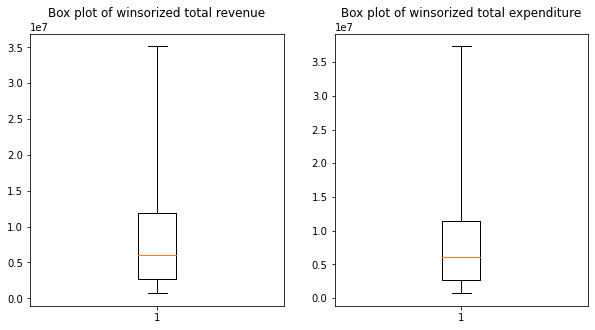

In [24]:
# 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE 
# variables, apply the techniques you learned in this lesson to eliminate 
# them and validate that there are no outlier values after you handle them.

# Remove outliers using winzorization.

plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
plt.boxplot(winsorize(education_df["TOTAL_REVENUE"], (0, 0.05)), whis = 5)
plt.title("Box plot of winsorized total revenue")

plt.subplot(1,2,2)
plt.boxplot(winsorize(education_df["TOTAL_EXPENDITURE"], (0, 0.05)), whis = 5)
plt.title("Box plot of winsorized total expenditure")

Text(0.5, 1.0, 'Box plot of budget deficit')

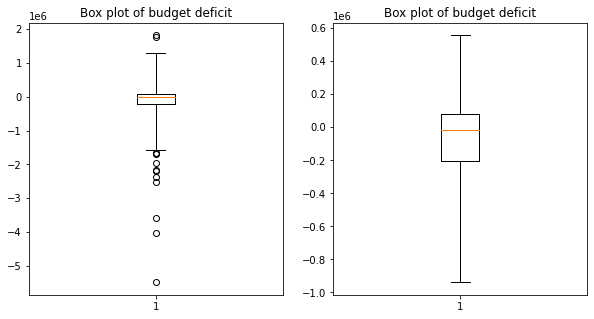

In [29]:
# 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE 
# (before you eliminated the outliers). You can think of it as a kind of budget deficit in 
# education. Do you find any outlier values in this new variable? If so, eliminate them using
# the technique that think is most suitable.

budget_deficit = education_df.TOTAL_REVENUE - education_df.TOTAL_EXPENDITURE

plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
plt.boxplot(budget_deficit, whis = 5)
plt.title("Box plot of budget deficit")

plt.subplot(1,2,2)
plt.boxplot(winsorize(budget_deficit, (0.05, 0.05)), whis = 5)
plt.title("Box plot of winsorized budget deficit")


Text(0.5, 1.0, 'Box plot of winsorized budget deficit')

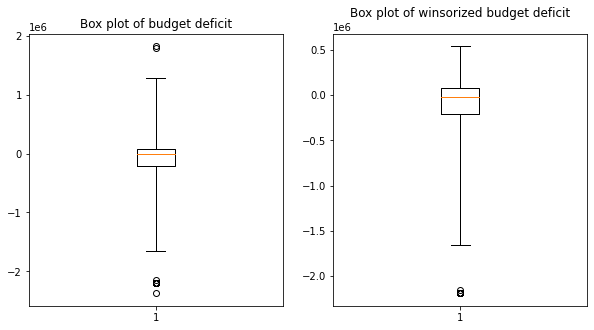

In [30]:
# 4. Now create another variable by subtracting TOTAL_EXPENDITURE from TOTAL_REVENUE. 
# This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. 
# In this newly created variable, can you find any outliers? If so, eliminate them.

budget_deficit_w = winsorize(education_df["TOTAL_REVENUE"], (0, 0.05)) - winsorize(education_df["TOTAL_EXPENDITURE"], (0, 0.05))

plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
plt.boxplot(budget_deficit_w, whis = 5)
plt.title("Box plot of budget deficit")

plt.subplot(1,2,2)
plt.boxplot(winsorize(winsorize(budget_deficit_w, (0.05, 0.05)), (0.05, 0.05)), whis = 5)
plt.title("Box plot of winsorized budget deficit")

In [31]:
# 5. Compare some basic descriptive statistics of the budget variables you end up with in the
# third and the fourth questions. Do you see any differences?

pd.DataFrame({"budget": budget_deficit, 
              "budget winzorized 1": winsorize(budget_deficit, (0.05, 0.05)),
              "budget winzorized 2": winsorize(budget_deficit_w, (0.05, 0.05))}).describe()

# The mean, min, and std are notably different depending on how outliers are removed in this case.

,budget,budget winzorized 1,budget winzorized 2
count,4.130000e+02,413.000000,4.130000e+02
mean,-1.073359e+05,-73128.285714,-1.613745e+05
std,6.026989e+05,345241.074194,5.813592e+05
min,-5.487742e+06,-940187.000000,-2.190438e+06
25%,-2.051510e+05,-205151.000000,-2.125430e+05
50%,-1.455000e+04,-14550.000000,-1.575500e+04
75%,8.356300e+04,83563.000000,8.197400e+04
max,1.816932e+06,557170.000000,5.400550e+05


In [ ]:
# 6. If your variable of interest is the budget deficit variable, which method do you think is
# the most appropriate in dealing with the outliers in this variable: the method in the third 
# question or the one in the fourth question?

# Probably the 3rd method. It removed outliers while not changing or adjusting how we view the
# data too much, adding another layer of manipulation to remove outliers seems unecessary and
# further obfuscates what we can pull from the data.